# Import Packages and Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings(action='ignore')

In [2]:
filepath =("dataset/spam.csv")

In [3]:
df = pd.read_csv(filepath , encoding=("ISO-8859-1"))

In [4]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [5]:
df.head(6)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN


In [6]:
df.tail(6)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...,NaN,NaN,NaN
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
columns = ['Unnamed: 2','Unnamed: 3','Unnamed: 4']
df.drop(columns, axis = 1, inplace = True)
df.head(10)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


# Exploratory Data Analysis

In [9]:
df.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [11]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [12]:
df.duplicated().sum()

403

In [13]:
df.drop_duplicates(keep= 'first', inplace = True)
df.duplicated().sum()

0

In [14]:
df['v1'].value_counts()

ham     4516
spam     653
Name: v1, dtype: int64

In [15]:
df.shape

(5169, 2)

In [16]:
df.size

10338

# Class Distributions

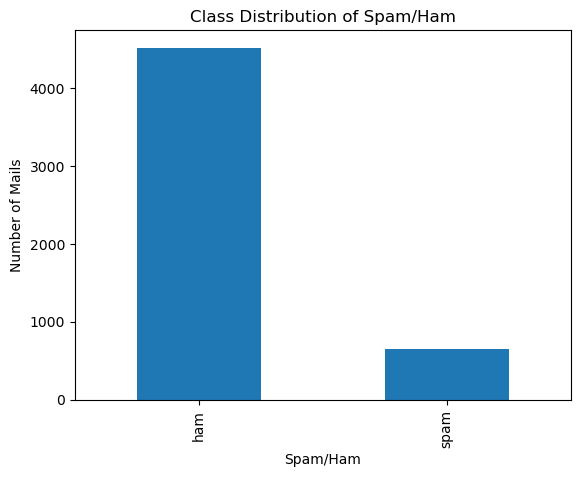

In [18]:
class_counts = df['v1'].value_counts()
class_counts.plot(kind='bar')
plt.title('Class Distribution of Spam/Ham')
plt.xlabel('Spam/Ham')
plt.ylabel('Number of Mails')
plt.show()

# Word Count

In [24]:
from collections import Counter
import re

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\elcot\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
all_text = ' '.join(df['v2'].values)
all_text = re.sub(r'http\S+', '', all_text)
all_text = re.sub(r'@\S+', '', all_text)
all_text = re.sub(r'#\S+', '', all_text)

In [21]:
words = all_text.split()

In [22]:
stop_words = set(stopwords.words('english'))
words = [word for word in words if not word in stop_words]

In [23]:
word_counts = Counter(words)
top_words = word_counts.most_common(100)
top_words

[('I', 1375),
 ('u', 614),
 ('2', 423),
 ('get', 313),
 ('call', 310),
 ("I'm", 277),
 ('U', 276),
 ('&lt;', 254),
 ('ur', 252),
 ('You', 243),
 ('go', 228),
 ('4', 226),
 ('like', 212),
 ('know', 206),
 ('got', 198),
 ('?', 183),
 ('come', 182),
 ('.', 168),
 ('...', 160),
 ('want', 153),
 ('time', 146),
 ('need', 140),
 ('going', 138),
 ('How', 135),
 ('Call', 134),
 ('send', 133),
 ('still', 129),
 ('one', 127),
 ('But', 120),
 ('n', 119),
 ('text', 118),
 ('No', 113),
 ('think', 111),
 ('If', 111),
 ('love', 111),
 ('So', 109),
 ('Just', 109),
 ('see', 108),
 ('We', 107),
 ('good', 107),
 ('back', 106),
 ("I'll", 106),
 ('Ì_', 105),
 ('Do', 104),
 ('r', 104),
 ('home', 102),
 ('&', 98),
 ('take', 96),
 ('tell', 96),
 ('What', 94),
 ('free', 94),
 ('And', 94),
 ('Your', 92),
 ('day', 91),
 ('dont', 90),
 ("i'm", 89),
 ('Ok', 87),
 ('me.', 87),
 ('make', 87),
 ('The', 84),
 ('new', 84),
 ('give', 84),
 ('mobile', 83),
 ('A', 83),
 ('you.', 82),
 ('ask', 81),
 ('much', 80),
 ('Hey', 7

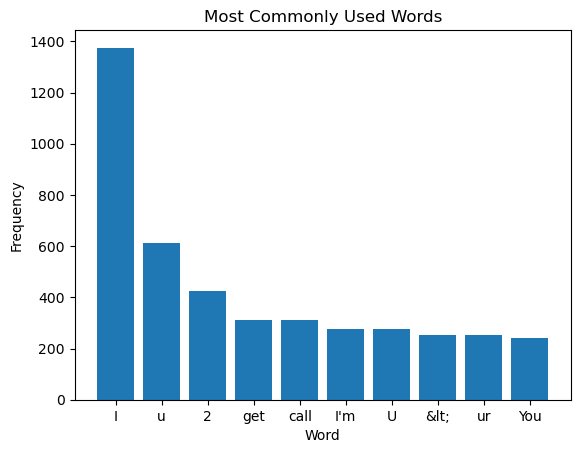

In [25]:
top_words = word_counts.most_common(10)
x_values = [word[0] for word in top_words]
y_values = [word[1] for word in top_words]
plt.bar(x_values, y_values)
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Most Commonly Used Words')
plt.show()

# Natural Language Processing

# Data Cleaning

In [26]:
def clean_text(text):
    # Remove HTML tags
    text = re.sub('<.*?>', '', text)
    # Remove non-alphabetic characters and convert to lowercase
    text = re.sub('[^a-zA-Z]', ' ', text).lower()
    # Tokenize the text
    words = nltk.word_tokenize(text)
    # Remove stopwords
    words = [w for w in words if w not in stopwords.words('english')]
    # Stem the words
    stemmer = PorterStemmer()
    words = [stemmer.stem(w) for w in words]
    # Join the words back into a string
    text = ' '.join(words)
    return text

In [31]:
from nltk.stem import PorterStemmer
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\elcot\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [32]:
from tqdm.auto import tqdm
import time

In [33]:
%%time

tqdm.pandas()

df['cleaned_text'] = df['v2'].progress_apply(clean_text)

  0%|          | 0/5169 [00:00<?, ?it/s]

Wall time: 1min 22s


#  Feature Extraction

In [34]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000)
X = cv.fit_transform(df['cleaned_text']).toarray()
y = df['v1']

# Split the DataSet for Training and Testing Purpose

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Classification Model

# Logistic Regression Model

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

# Predicitons

In [38]:
y_pred = clf.predict(X_test)
y_pred

array(['ham', 'ham', 'ham', ..., 'spam', 'ham', 'ham'], dtype=object)

# Accuracy

In [43]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc*100,'%')

Accuracy: 98.16247582205028 %


# Confusion Matrix

<AxesSubplot:>

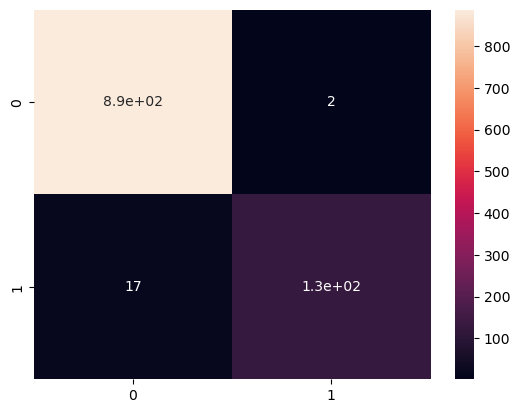

In [40]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

import seaborn as sns
sns.heatmap(cm, annot=True)

In [41]:
cm

array([[887,   2],
       [ 17, 128]], dtype=int64)

# Classification Report 

In [42]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       889
        spam       0.98      0.88      0.93       145

    accuracy                           0.98      1034
   macro avg       0.98      0.94      0.96      1034
weighted avg       0.98      0.98      0.98      1034

